# 显示混淆矩阵

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [39]:
predicts_path = "../saved/ours_predicts.npy"
# predicts_path = "../saved/fetril_predicts.npy"
# predicts_path = "../saved/fecam_predicts.npy"
predicts = np.load(predicts_path)
predicts.shape

(10000, 2)

In [40]:
pred_labels = predicts[:,0]
true_labels = predicts[:,1]

In [41]:
# 计算混淆矩阵
cm = confusion_matrix(true_labels, pred_labels)
cm.shape

(100, 100)

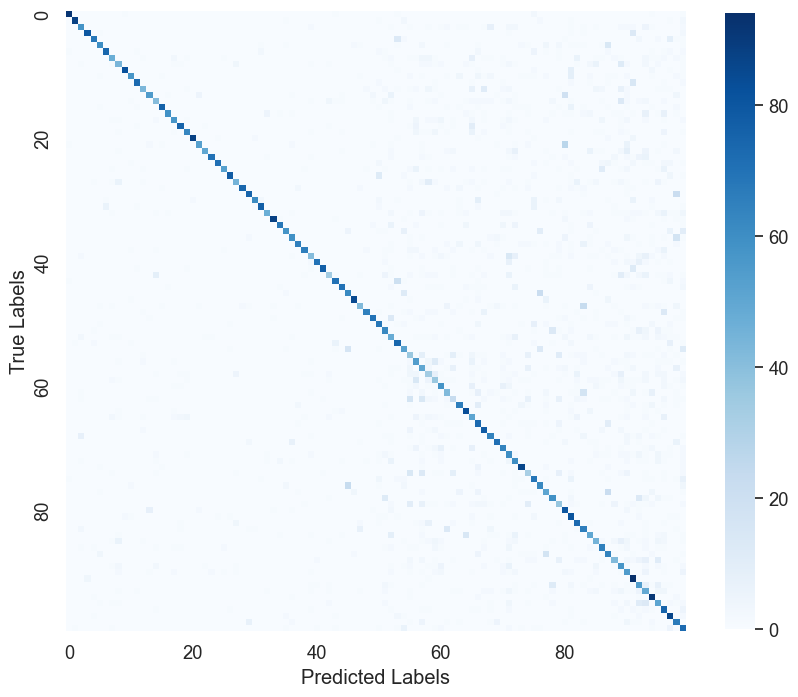

In [42]:
# 设置Seaborn的样式
sns.set(font_scale=1.2)

# 绘制热力图
plt.figure(figsize=(10, 10))
sns.heatmap(cm, fmt="d", cmap="Blues",cbar=True, cbar_kws={"shrink": 0.8},
            xticklabels=20, yticklabels=20, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 修改FeTrIL和FeCAM以保存最后一个任务的完整分类结果

In [ ]:
# 在after_task函数中添加

# save last predicts
y_pred, y_true = self._eval_cnn(self.test_loader) # for FeTrIL
y_pred, y_true = self._eval_maha(self.test_loader, self._init_protos, self._protos) # for FeCAM

y_pred = y_pred[:, 0]  # [N]
predicts = np.stack((y_pred, y_true), axis=1)  # [N, 2]
np.save("fetril_predicts.npy", predicts)